In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

In [7]:
# credible; makes dictionary of datasets sorted by user (credible), and dataframe of all credible tweets with username as additional column (credible_df) 
df_path = glob.glob('./HealthOrg/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

    df_ls.append(covid)

healthorg_df = pd.concat(df_ls, ignore_index = True)

# fix dates

dates = []
for date in healthorg_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

healthorg_df["date"] = dates

# filter for tweets in first half of 2020

healthorg_df = healthorg_df[healthorg_df["date"] <= datetime.date(2020,6,30)]
healthorg_df = healthorg_df.drop_duplicates("tweet")

df_names = []
for line in healthorg_df["username"].unique():
    df_names.append(line)


In [8]:
# News_Outlets
df_path = glob.glob('./News_Outlets/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet', 'date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

news_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in news_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

news_df["date"] = dates
news_df = news_df[news_df["date"] <= datetime.date(2020,6,30)]
news_df = news_df.drop_duplicates("tweet")

for line in news_df["username"].drop_duplicates():
    df_names.append(line)

C:\Users\Maggie\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
# Individual
df_path = glob.glob('./Individual/*.csv')
trump = pd.read_csv("./Individual/trump_tweets.csv") #https://www.kaggle.com/codebreaker619/donald-trump-tweets-dataset
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
        df_ls.append(covid)

    except:
        continue

ind_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in ind_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

ind_df["date"] = dates
ind_df = ind_df[ind_df["date"] <= datetime.date(2020, 6, 30)]
ind_df = ind_df.drop_duplicates("tweet")

for line in ind_df["username"].drop_duplicates():
    df_names.append(line)

# rename dataset columns to match others
trump["tweet"] = trump["text"]
trump["retweets_count"] = trump["retweets"]
trump["likes_count"] = trump["favorites"]
trump["retweet"] = trump["isRetweet"]
trump = trump[["tweet", "date", "retweets_count", "likes_count", "retweet"]]

#filter dates
trump_dates = trump["date"]
trump_dates_corr = []
trump_dates_corr = [d[:10] for d in trump_dates]
trump_dates_corr = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in trump_dates_corr]
trump["date"] = trump_dates_corr
trump = trump[trump["date"] >= datetime.datetime(2019,12,31)]
trump = trump[trump["date"] <= datetime.datetime(2020, 6, 30)]

# add to individual tweets dataframe
ind_df = pd.concat([ind_df, trump])

for line in ind_df["username"].drop_duplicates().dropna():
    df_names.append(line)


In [40]:
# fake news

CMUID = pd.read_csv("./fake news/CMUID_hydrated.csv", index_col=0)
covidFake = pd.read_csv("./fake news/covidFakesID_reformatted.csv", index_col=0)
misinformation = pd.read_csv("./fake news/Misinformation_hydrated.csv", index_col=0)
fakeTweets = pd.read_csv("./Cross-SEAN Dataset/Fake_Tweets.csv", index_col=0)

fake = [CMUID, covidFake, misinformation, fakeTweets]

dfs = pd.concat(fake)

dfs = dfs[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

fake_dfs = dfs

# fake_dfs = pd.concat([fake_dfs, dfs])

# fix date

dates = fake_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

fake_dfs["date"] = dates
fake_dfs = fake_dfs.drop("created_at", axis=1)

fake_dfs = fake_dfs[fake_dfs["date"] >= datetime.date(2019,12,31)]
fake_dfs = fake_dfs[fake_dfs["date"] <= datetime.date(2020,6,30)]
fake_dfs = fake_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    fake_dfs = fake_dfs[fake_dfs["user_screen_name"].str.lower().str.contains(name) == False]

In [ ]:
"""# real tweets from CoAID-master
claim_real = glob.glob("./CoAID-master/*/ClaimRealCOVID-19_tweets_hydrated.csv")
news_real = glob.glob("./CoAID-master/*/NewsRealCOVID-19_tweets_hydrated.csv")

real_dfs = []

#  df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

# coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified

for path in claim_real:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    real_dfs.append(df)

for path in news_real:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    real_dfs.append(df)

real_dfs = pd.concat(real_dfs)

# fix date

dates = real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

real_dfs["date"] = dates
real_dfs = real_dfs.drop("created_at", axis=1)"""

In [41]:
# real tweets
realTweets = pd.read_csv("./Cross-SEAN Dataset/Real_Tweets.csv", index_col=0)
real_dfs = realTweets[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

# fix date
dates = real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df
real_dfs["date"] = dates
real_dfs = real_dfs.drop("created_at", axis=1)
real_dfs = real_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    real_dfs = real_dfs[real_dfs["user_screen_name"].str.lower().str.contains(name) == False]


<ipython-input-41-3e4fb2318373>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_dfs["date"] = dates


'\nplt.figure(figsize=[30, 20])\nhealthorg_dates.sort_index().plot()\nind_dates.sort_index().plot()\nnews_dates.sort_index().plot()\nfake_tweets.sort_index().plot()\nreal_tweets.sort_index().plot()\nplt.legend(["healthorg", "ind", "news", "fake", "real"])\n'

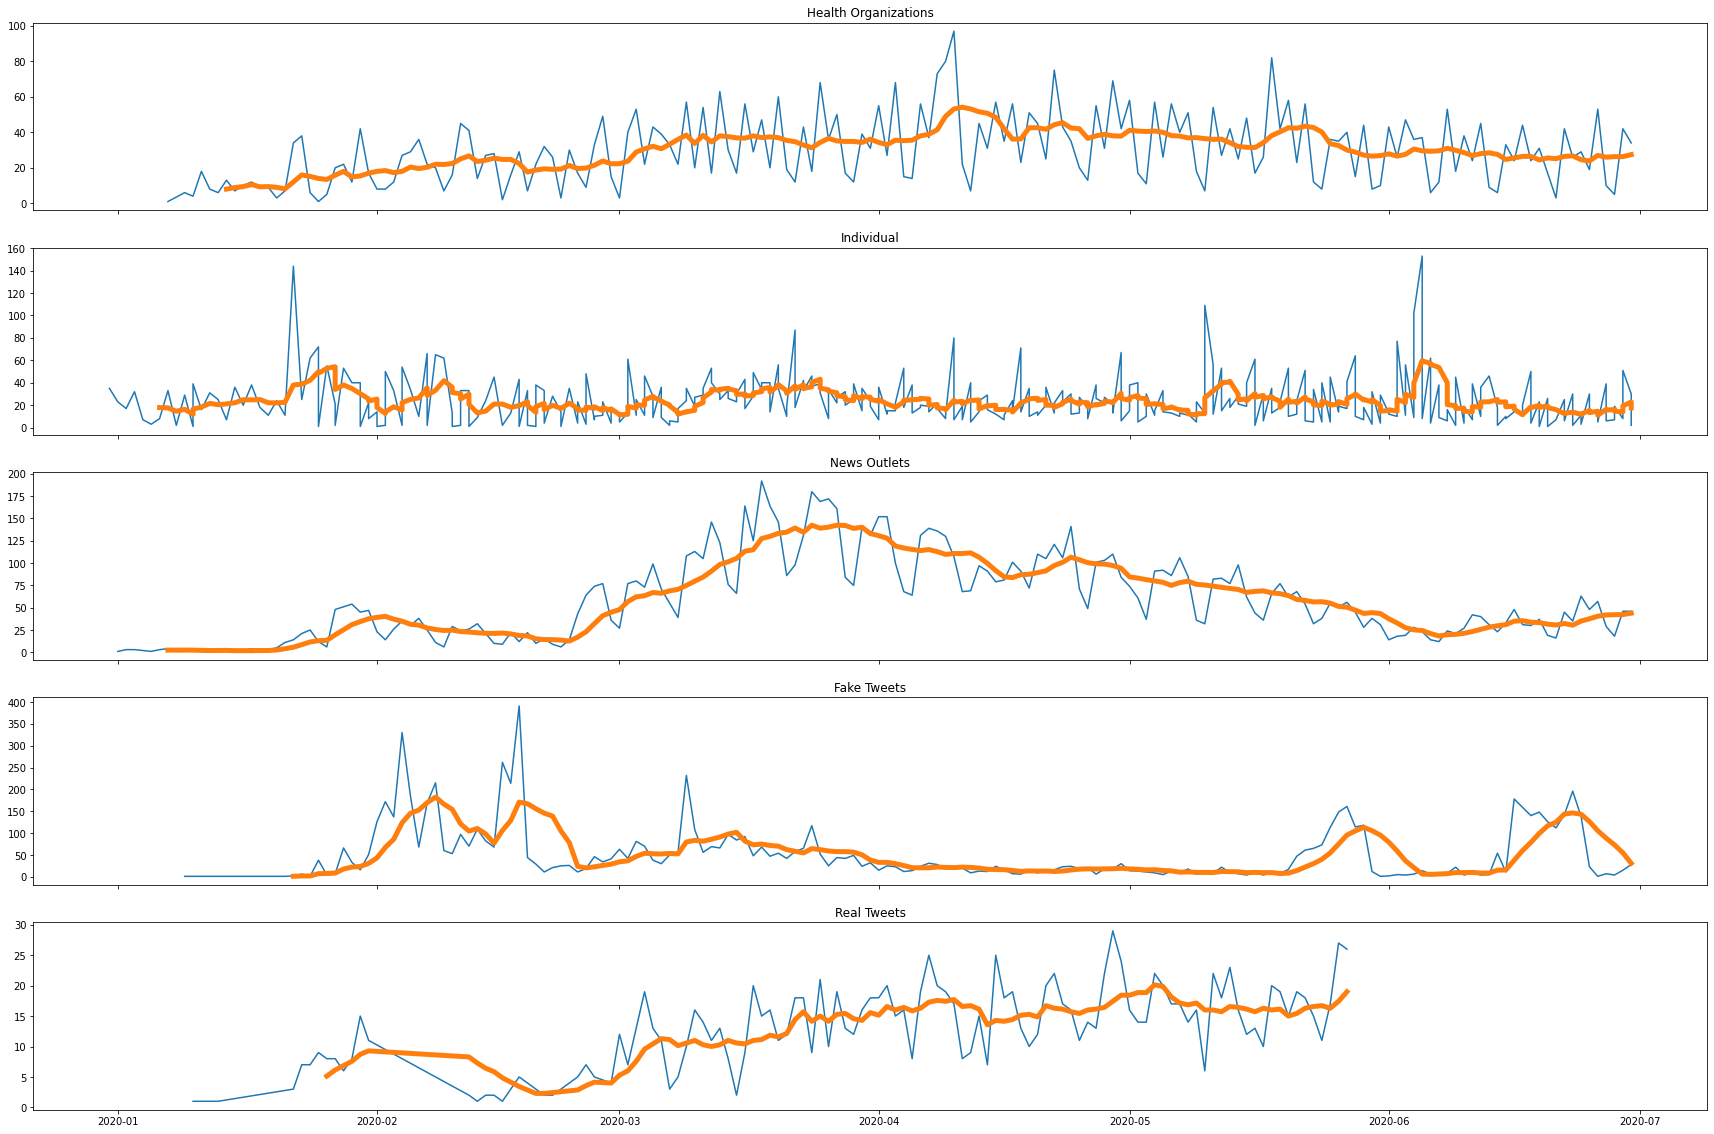

In [42]:
# plotting without weights

healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
ind_dates = ind_df.sort_values("date", ascending=True)["date"].value_counts()
news_dates = news_df.sort_values("date", ascending=True)["date"].value_counts()

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts()

fig, axes = plt.subplots(5, 1, figsize=[30, 20], sharex=True)
axes[0].plot(healthorg_dates.sort_index())
axes[0].plot(healthorg_dates.sort_index().rolling(window=7).mean(), linewidth=5)
axes[0].set_title("Health Organizations")

axes[1].plot(ind_dates.sort_index())
axes[1].plot(ind_dates.sort_index().rolling(window=7).mean(), linewidth=5)
axes[1].set_title("Individual")

axes[2].plot(news_dates.sort_index())
axes[2].plot(news_dates.sort_index().rolling(window=7).mean(), linewidth=5)
axes[2].set_title("News Outlets")

axes[3].plot(fake_tweets.sort_index())
axes[3].plot(fake_tweets.sort_index().rolling(window=7).mean(), linewidth=5)
axes[3].set_title("Fake Tweets")

axes[4].plot(real_tweets.sort_index())
axes[4].plot(real_tweets.sort_index().rolling(window=7).mean(), linewidth=5)
axes[4].set_title("Real Tweets")

'''
plt.figure(figsize=[30, 20])
healthorg_dates.sort_index().plot()
ind_dates.sort_index().plot()
news_dates.sort_index().plot()
fake_tweets.sort_index().plot()
real_tweets.sort_index().plot()
plt.legend(["healthorg", "ind", "news", "fake", "real"])
'''

In [ ]:
# ideas to move forward with
# --> moving average
# --> time series forecasting

In [43]:
# exploring engagement

healthorg_engagement = healthorg_df[["replies_count", "retweets_count", "likes_count"]]
stats_healthorg_engagement = healthorg_engagement.sum()
total_healthorg_engagement = stats_healthorg_engagement.sum()

weight_healthorg_engagement = stats_healthorg_engagement / total_healthorg_engagement

healthorg_reply_score = stats_healthorg_engagement[0] * weight_healthorg_engagement[0]
healthorg_retweet_score = stats_healthorg_engagement[1] * weight_healthorg_engagement[1]
healthorg_likes_score = stats_healthorg_engagement[2] * weight_healthorg_engagement[2]

healthorg_score = (healthorg_reply_score + healthorg_retweet_score + healthorg_likes_score) / 3

# get total followers
file = pd.read_csv("healthorg_followers", usecols=[0, 1])
healthorg_followers = file["followers"].sum()

healthorg_engagement_score = healthorg_score / healthorg_followers
healthorg_engagement_score

# run by one of the mentors! --> Mark Ebden <3

0.04371961956965224

In [44]:
# exploring engagement, exclusing replies

healthorg_engagement = healthorg_df[["retweets_count", "likes_count"]]
stats_healthorg_engagement = healthorg_engagement.sum()
total_healthorg_engagement = stats_healthorg_engagement.sum()

weight_healthorg_engagement = stats_healthorg_engagement / total_healthorg_engagement

healthorg_retweet_score = stats_healthorg_engagement[0] * weight_healthorg_engagement[0]
healthorg_likes_score = stats_healthorg_engagement[1] * weight_healthorg_engagement[1]

healthorg_score = (healthorg_retweet_score + healthorg_likes_score) / 2

# get total followers
file = pd.read_csv("healthorg_followers", usecols=[0, 1])
healthorg_followers = file["followers"].sum()

healthorg_engagement_score = healthorg_score / healthorg_followers
healthorg_engagement_score

# run by one of the mentors! --> Mark Ebden <3

0.06895496154224462

In [45]:
# exploring individual engagement

ind_engagement = ind_df[["replies_count", "retweets_count", "likes_count"]]
stats_ind_engagement = ind_engagement.sum()
total_ind_engagement = stats_ind_engagement.sum()

weight_ind_engagement = stats_ind_engagement / total_ind_engagement

ind_reply_score = stats_ind_engagement[0] * weight_ind_engagement[0]
ind_retweet_score = stats_ind_engagement[1] * weight_ind_engagement[1]
ind_likes_score = stats_ind_engagement[2] * weight_ind_engagement[2]

ind_score = (ind_reply_score + ind_retweet_score + ind_likes_score) / 3

# get total followers
file = pd.read_csv("ind_followers", usecols=[0, 1])
ind_followers = file["followers"].sum()

ind_engagement_score = ind_score / ind_followers
ind_engagement_score

0.4645747103817366

In [46]:
# exploring individual engagement, excluding replies

ind_engagement = ind_df[["retweets_count", "likes_count"]]
stats_ind_engagement = ind_engagement.sum()
total_ind_engagement = stats_ind_engagement.sum()

weight_ind_engagement = stats_ind_engagement / total_ind_engagement

ind_retweet_score = stats_ind_engagement[0] * weight_ind_engagement[0]
ind_likes_score = stats_ind_engagement[1] * weight_ind_engagement[1]

ind_score = (ind_retweet_score + ind_likes_score) / 2

# get total followers
file = pd.read_csv("ind_followers", usecols=[0, 1])
ind_followers = file["followers"].sum()

ind_engagement_score = ind_score / ind_followers
ind_engagement_score

0.7001093432444762

In [47]:
# exploring individual engagement

news_engagement = news_df[["replies_count", "retweets_count", "likes_count"]]
stats_news_engagement = news_engagement.sum()
total_news_engagement = stats_news_engagement.sum()

weight_news_engagement = stats_news_engagement / total_news_engagement

news_reply_score = stats_news_engagement[0] * weight_news_engagement[0]
news_retweet_score = stats_news_engagement[1] * weight_news_engagement[1]
news_likes_score = stats_news_engagement[2] * weight_news_engagement[2]

news_score = (news_reply_score + news_retweet_score + news_likes_score) / 3

# get total followers
file = pd.read_csv("news_followers", usecols=[0, 1])
news_followers = file["followers"].sum()

news_engagement_score = news_score / news_followers
news_engagement_score

0.026397845734571882

In [48]:
# exploring news engagement, excluding replies

news_engagement = news_df[["retweets_count", "likes_count"]]
stats_news_engagement = news_engagement.sum()
total_news_engagement = stats_news_engagement.sum()

weight_news_engagement = stats_news_engagement / total_news_engagement

news_retweet_score = stats_news_engagement[0] * weight_news_engagement[0]
news_likes_score = stats_news_engagement[1] * weight_news_engagement[1]

news_score = (news_retweet_score + news_likes_score) / 2

# get total followers
file = pd.read_csv("news_followers", usecols=[0, 1])
news_followers = file["followers"].sum()

news_engagement_score = news_score / news_followers
news_engagement_score

0.043083026143206644

In [49]:
# exploring fake engagement

fake_engagement = fake_dfs[["retweet_count", "favorite_count"]]
stats_fake_engagement = fake_engagement.sum()
total_fake_engagement = stats_fake_engagement.sum()

weight_fake_engagement = stats_fake_engagement / total_fake_engagement

fake_retweet_score = stats_fake_engagement[0] * weight_fake_engagement[0]
fake_likes_score = stats_fake_engagement[1] * weight_fake_engagement[1]

fake_score = (fake_retweet_score + fake_likes_score) / 2

# get total followers
fake_followers = fake_dfs["user_followers_count"].drop_duplicates().sum()

fake_engagement_score = fake_score / fake_followers
fake_engagement_score

0.0029763462893829555

In [50]:
# exploring real engagement

real_engagement = real_dfs[["retweet_count", "favorite_count"]]
stats_real_engagement = real_engagement.sum()
total_real_engagement = stats_real_engagement.sum()

weight_real_engagement = stats_real_engagement / total_real_engagement

real_retweet_score = stats_real_engagement[0] * weight_real_engagement[0]
real_likes_score = stats_real_engagement[1] * weight_real_engagement[1]

real_score = (real_retweet_score + real_likes_score) / 2

# get total followers
real_followers = real_dfs["user_followers_count"].drop_duplicates().sum()

real_engagement_score = real_score / real_followers
real_engagement_score

0.0006673148808792486

Text(0.5, 1.0, 'Real Tweets')

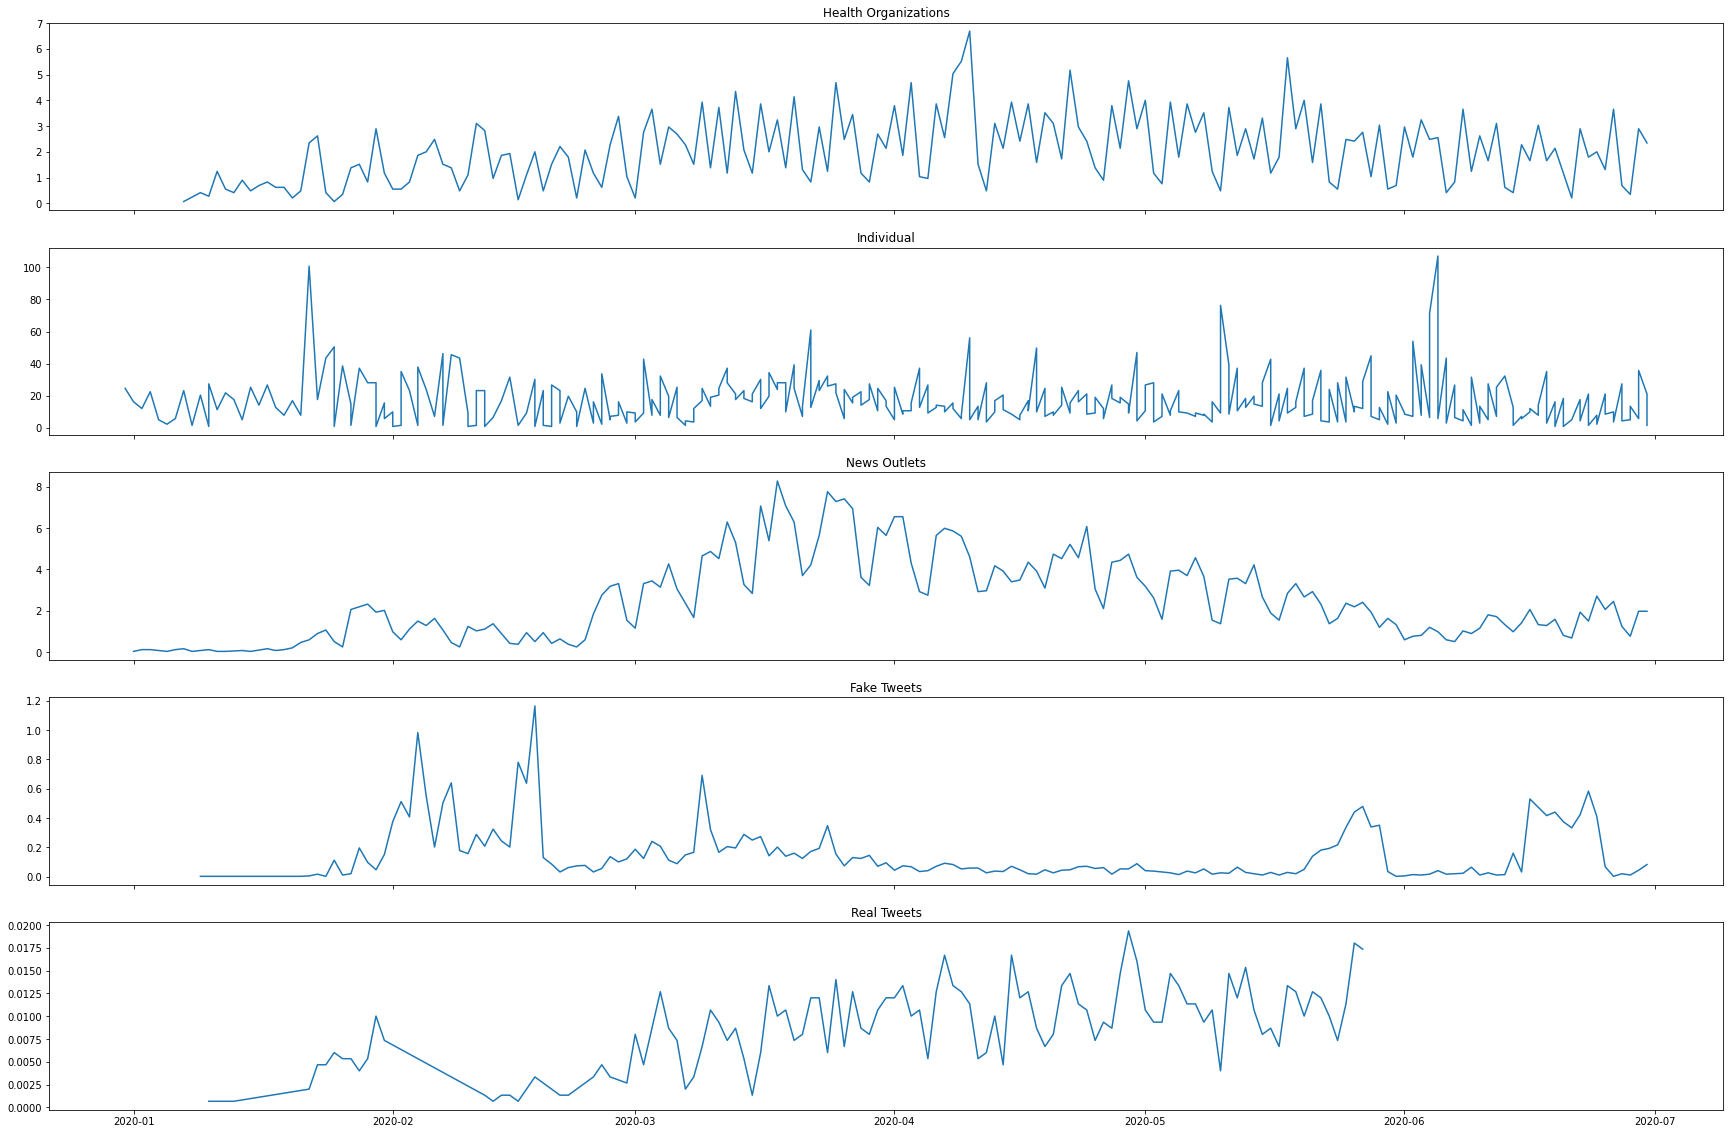

In [51]:
# plotting with weights

healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts() * healthorg_engagement_score
ind_dates = ind_df.sort_values("date", ascending=True)["date"].value_counts() * ind_engagement_score
news_dates = news_df.sort_values("date", ascending=True)["date"].value_counts() * news_engagement_score

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts() * fake_engagement_score
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts() * real_engagement_score

fig, axes = plt.subplots(5, 1, figsize=[30, 20], sharex=True)

axes[0].plot(healthorg_dates.sort_index())
axes[0].set_title("Health Organizations")
axes[1].plot(ind_dates.sort_index())
axes[1].set_title("Individual")
axes[2].plot(news_dates.sort_index())
axes[2].set_title("News Outlets")
axes[3].plot(fake_tweets.sort_index())
axes[3].set_title("Fake Tweets")
axes[4].plot(real_tweets.sort_index())
axes[4].set_title("Real Tweets")

In [52]:
# tweet count

health_count = healthorg_df["tweet"].count()
ind_count = ind_df["tweet"].count()
news_count = news_df["tweet"].count()

fake_count = fake_dfs["text"].count()
real_count = real_dfs["text"].count()

print("HealthOrg Tweets: \t{}\nIndividual Tweets: \t{}\nNews Outlet Tweets: \t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(health_count, ind_count, news_count, fake_count, real_count))

HealthOrg Tweets: 	5197
Individual Tweets: 	7779
News Outlet Tweets: 	10462
Fake Tweets:		8575
Real Tweets:		1477



In [53]:
# followers count

print("HealthOrg Followers: \t{}\nIndividual Followers: \t{}\nNews Outlet Followers: \t{}\nFake Followers:\t\t{}\nReal Followers:\t\t{}\n".format(healthorg_followers, ind_followers, news_followers, fake_followers, real_followers))

HealthOrg Followers: 	15681489
Individual Followers: 	177318491
News Outlet Followers: 	76552096
Fake Followers:		1237085448
Real Followers:		173822429

